In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pprint as pp

from math import pi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# EDA

Выведем список предоставляемых файлов

In [2]:
DATA_DIR = 'data/'
list_data_files = os.listdir(DATA_DIR)
pp.pprint(list_data_files)

['wpbc.names',
 'wdbc.names',
 'unformatted-data',
 'breast-cancer-wisconsin.names',
 'breast-cancer-wisconsin.data',
 'wdbc.data',
 'wpbc.data']


Возьмем имена колонок из датасета размещенного на Kaggle для нашего датасета `wdbc`
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.

In [7]:
wdbc_columns_names = [
    'id','diagnosis','radius-Mean','texture-Mean','perimeter-Mean','area-Mean','smoothness-Mean',
    'compactness-Mean','concavity-Mean','concave-points-Mean','symmetry-Mean','fractal-dimension-Mean',
    'radius-SE','texture-SE','perimeter-SE','area-SE','smoothness-SE','compactness-SE','concavity-SE',
    'concave-points-SE','symmetry-SE','fractal-dimension-SE','radius-Worst','texture-Worst','perimeter-Worst',
    'area-Worst','smoothness-Worst','compactness-Worst','concavity-Worst','concave-points-Worst','symmetry-Worst',
    'fractal-dimension-Worst'
]

Загрузим данные в pandas из директории `data` и выведем часть данных.

In [34]:
# df_wpbc = pd.read_csv(DATA_DIR+'wpbc.data', header=None) 
# df_wpbc.columns = ['id','outcome','time'] + ['wp_f{}'.format(i) for i in range(3, 35)]
# df_wpbc.set_index('id', inplace=True)

# df_bcw = pd.read_csv(DATA_DIR+'breast-cancer-wisconsin.data',header=None)
# df_bcw.columns = ['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 
#                   'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
#                   'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
# df_bcw.set_index('Sample_code_number', inplace=True)

df_wdbc = pd.read_csv(DATA_DIR+'wdbc.data',header=None)
# df_wdbc.columns = ['id','diagnosis'] + ['wd_f{}'.format(i) for i in range(3, 33)]
df_wdbc.columns = wdbc_columns_names
df_wdbc.set_index('id', inplace=True)

df_wdbc.head()

,diagnosis,radius-Mean,texture-Mean,perimeter-Mean,area-Mean,smoothness-Mean,compactness-Mean,concavity-Mean,concave-points-Mean,symmetry-Mean,...,radius-Worst,texture-Worst,perimeter-Worst,area-Worst,smoothness-Worst,compactness-Worst,concavity-Worst,concave-points-Worst,symmetry-Worst,fractal-dimension-Worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Выведем информацию о размере датасета `wdbc` и целевой переменной `diagnosis`.

In [35]:
print(df_wdbc.shape)
print(df_wdbc['diagnosis'].value_counts())

(569, 31)
B    357
M    212
Name: diagnosis, dtype: int64


Датасет `wdbc` имеет `31` колонку без учета индекса, а также количество строк `569`. Целевая переменная `diagnosis` принимает значения `B` и `M` в соотношении `357` к `212`, что говорит о несбалансированности выборки.

Определим в выборке количество пропущенных данных, категориальных признаков и null-значений.

In [36]:
df_wdbc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius-Mean                569 non-null float64
texture-Mean               569 non-null float64
perimeter-Mean             569 non-null float64
area-Mean                  569 non-null float64
smoothness-Mean            569 non-null float64
compactness-Mean           569 non-null float64
concavity-Mean             569 non-null float64
concave-points-Mean        569 non-null float64
symmetry-Mean              569 non-null float64
fractal-dimension-Mean     569 non-null float64
radius-SE                  569 non-null float64
texture-SE                 569 non-null float64
perimeter-SE               569 non-null float64
area-SE                    569 non-null float64
smoothness-SE              569 non-null float64
compactness-SE             569 non-null float64
concavity-SE               569 non-null float64
concave-points-SE        

In [37]:
df_wdbc.isnull().sum()

diagnosis                  0
radius-Mean                0
texture-Mean               0
perimeter-Mean             0
area-Mean                  0
smoothness-Mean            0
compactness-Mean           0
concavity-Mean             0
concave-points-Mean        0
symmetry-Mean              0
fractal-dimension-Mean     0
radius-SE                  0
texture-SE                 0
perimeter-SE               0
area-SE                    0
smoothness-SE              0
compactness-SE             0
concavity-SE               0
concave-points-SE          0
symmetry-SE                0
fractal-dimension-SE       0
radius-Worst               0
texture-Worst              0
perimeter-Worst            0
area-Worst                 0
smoothness-Worst           0
compactness-Worst          0
concavity-Worst            0
concave-points-Worst       0
symmetry-Worst             0
fractal-dimension-Worst    0
dtype: int64

Пропущенных данных нет. Единственным категориальным признаком является целевая переменная `diagnosis`. Признаков со значениями null в данных нет.

Преобразуем целевую переменную из категориального типа в числовой: 
$$X:\{M,B\}\rightarrow {X}':\{1,0\}$$ 
Где $M$ - malignant, негативный результат, а $B$ - benign, позитивный.

In [44]:
df_wdbc['diagnosis'] = df_wdbc['diagnosis'].map({'M':1, 'B':0})
df_wdbc['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Проверим датасет на наличие дубликатов.

In [53]:
print("Дубликатов в данных: {}".format(len(df_wdbc[df_wdbc.duplicated()])))

Дубликатов в данных: 0


## Визуальный анализ

Выведем графики гистограмм для каждого признака и сгруппируем данные отностильно целевой переменной.

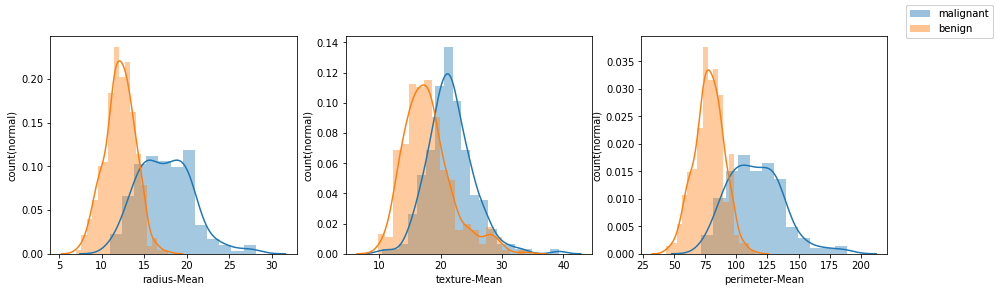

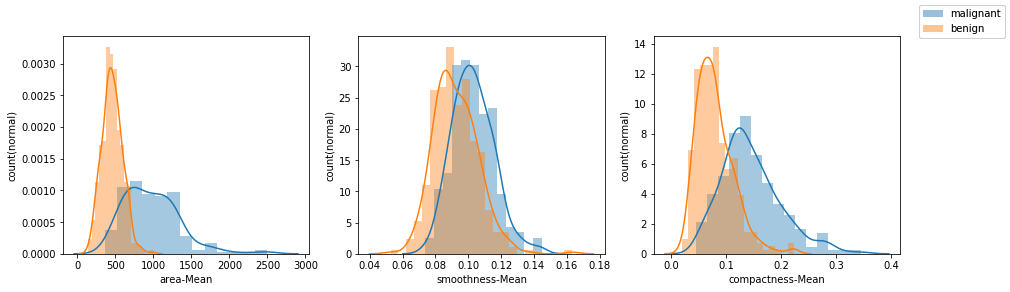

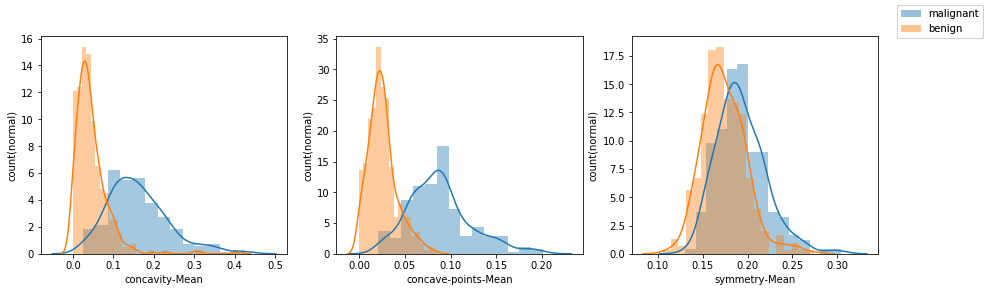

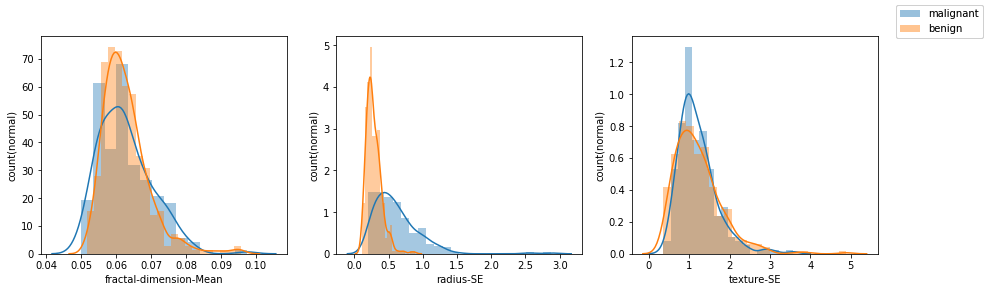

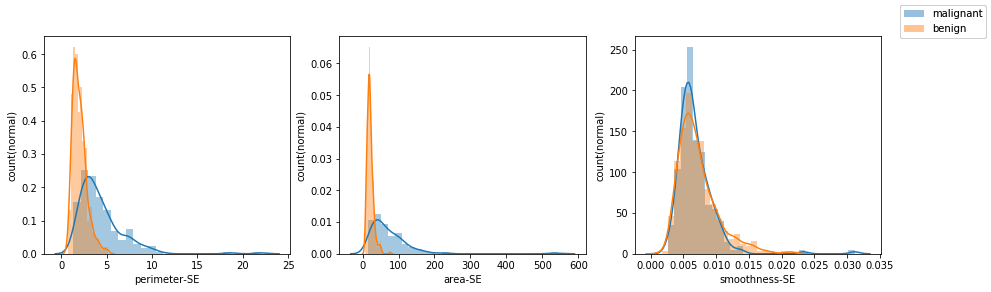

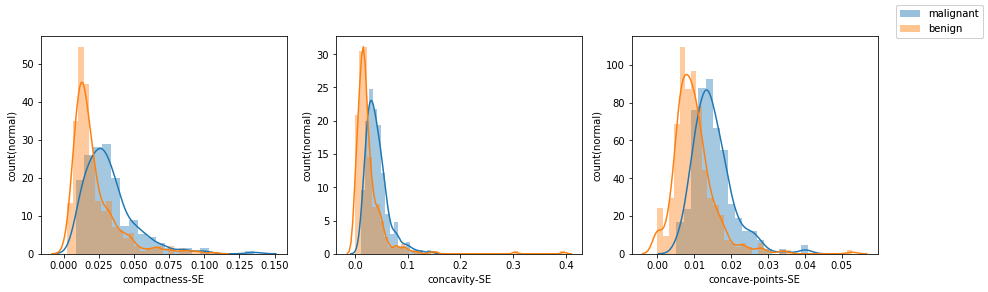

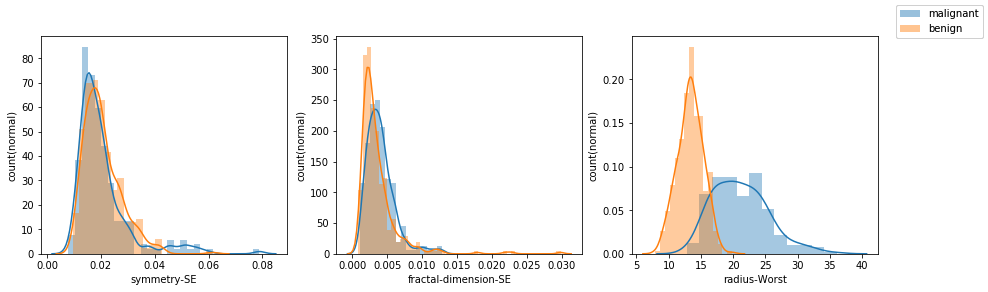

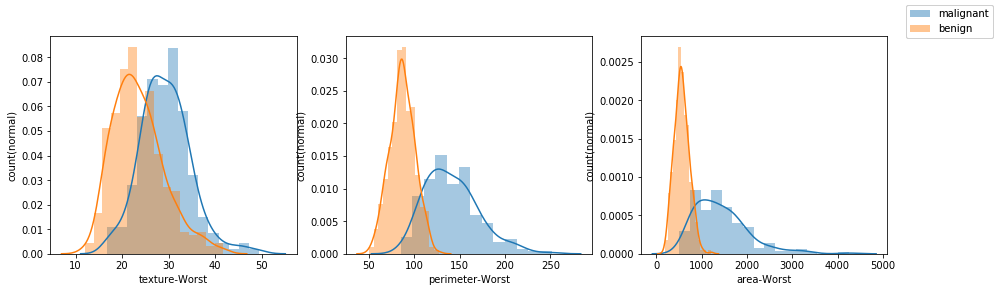

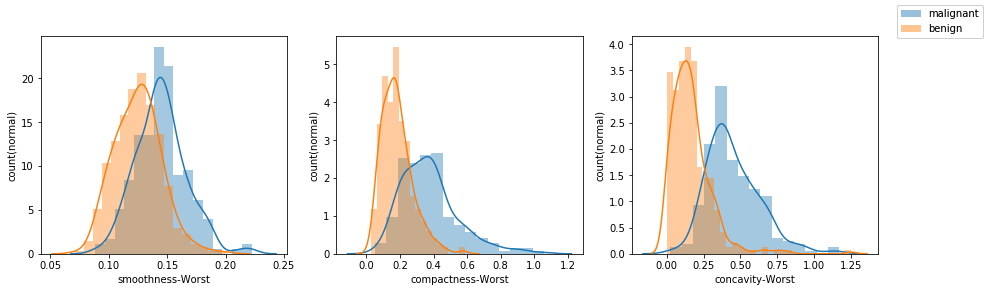

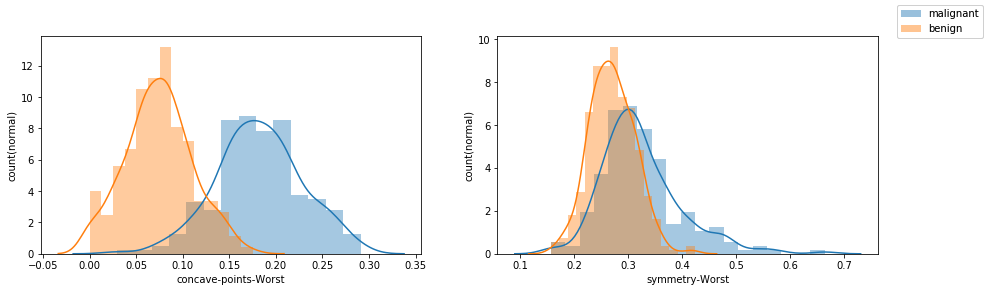

In [188]:
def draw_plot(future, ax_num):
    sns.distplot(df_wdbc[['diagnosis',future]][df_wdbc.diagnosis == 1][future], ax=axs[ax_num])
    sns.distplot(df_wdbc[['diagnosis',future]][df_wdbc.diagnosis == 0][future], ax=axs[ax_num])
    axs[ax_num].set(xlabel=future, ylabel='count(normal)')
    fig.legend(labels=['malignant','benign'])
    axs[ax_num].set(xlabel=future, ylabel='count(normal)');

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('radius-Mean' ,0)
draw_plot('texture-Mean' ,1)
draw_plot('perimeter-Mean' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('area-Mean' ,0)
draw_plot('smoothness-Mean' ,1)
draw_plot('compactness-Mean' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('concavity-Mean' ,0)
draw_plot('concave-points-Mean' ,1)
draw_plot('symmetry-Mean' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('fractal-dimension-Mean' ,0)
draw_plot('radius-SE' ,1)
draw_plot('texture-SE' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('perimeter-SE' ,0)
draw_plot('area-SE' ,1)
draw_plot('smoothness-SE' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('compactness-SE' ,0)
draw_plot('concavity-SE' ,1)
draw_plot('concave-points-SE' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('symmetry-SE' ,0)
draw_plot('fractal-dimension-SE' ,1)
draw_plot('radius-Worst' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('texture-Worst' ,0)
draw_plot('perimeter-Worst' ,1)
draw_plot('area-Worst' ,2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('smoothness-Worst' ,0)
draw_plot('compactness-Worst' ,1)
draw_plot('concavity-Worst' ,2)

fig, axs = plt.subplots(ncols=2,figsize=(15,4))
draw_plot('concave-points-Worst' ,0)
draw_plot('symmetry-Worst' ,1)

С помщью визуального анализа выведем графики, в которых ассиметрия для `malignant` и `benign` противоположна, имеется характерная разница между мат.ожиданием или имеется разница между длинами хвостов.

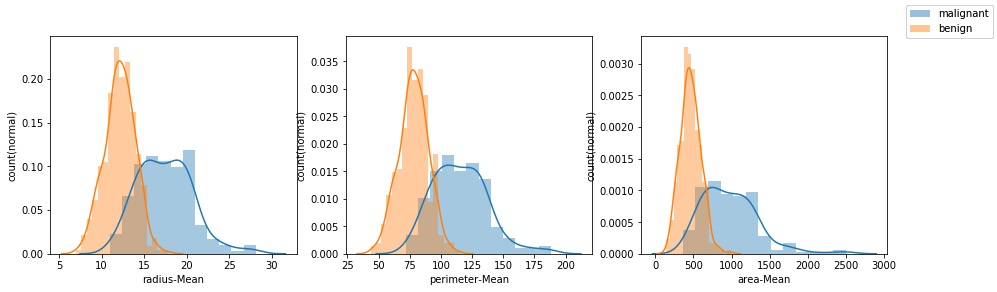

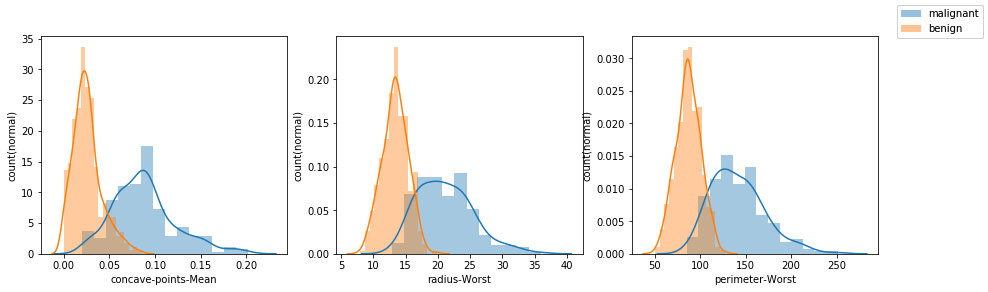

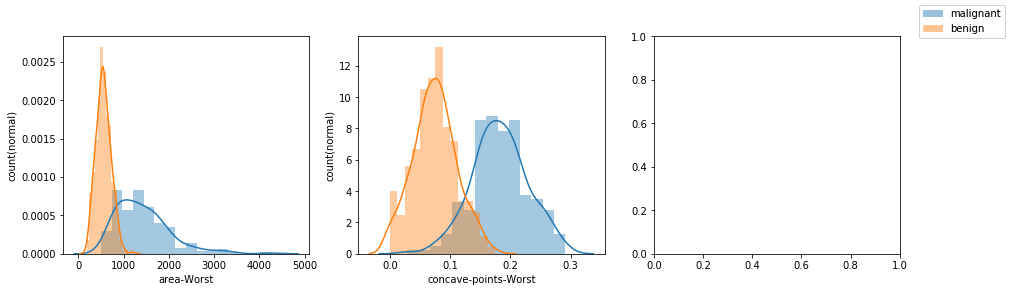

In [194]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('radius-Mean' ,0)
draw_plot('perimeter-Mean',1)
draw_plot('area-Mean',2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('concave-points-Mean',0)
draw_plot('radius-Worst',1)
draw_plot('perimeter-Worst',2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('area-Worst',0)
draw_plot('concave-points-Worst',1)

При визуальном анализе были выделены слежующие значимые признаки:

|Значимые признаки при визуальном анализе| 
-
|radius-Mean|
|perimeter-Mean|
|area-Mean|
|concave-points-Mean|
|radius-Worst|
|perimeter-Worst|
|area-Worst|
|concave-points-Worst|

Выведем их графики отдельно. B проставим коэффиценты значимости каждому признаку исходя из визуального анализа, где 8 - макимальная значимость, а 1 минимальная.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


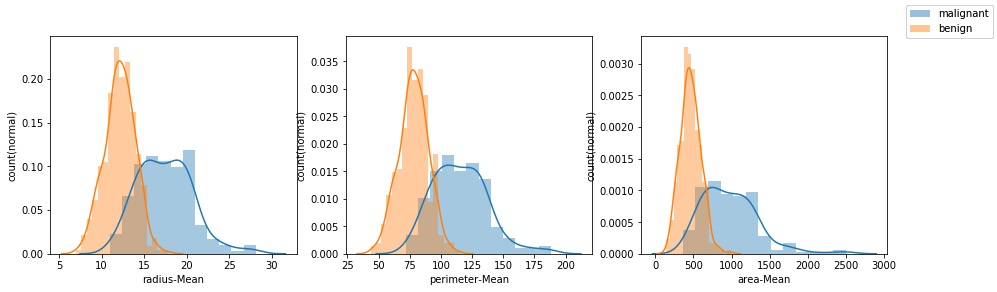

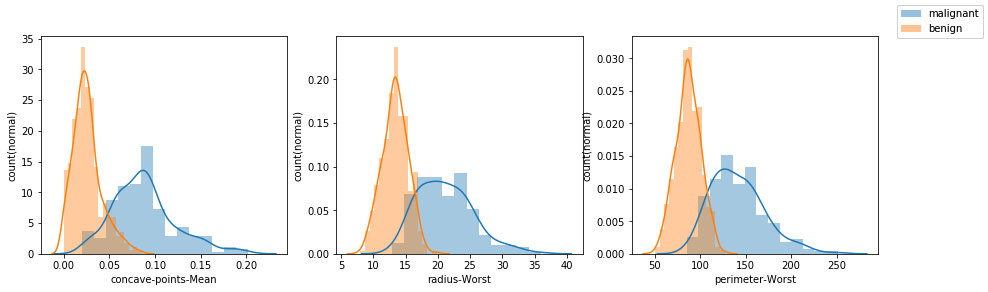

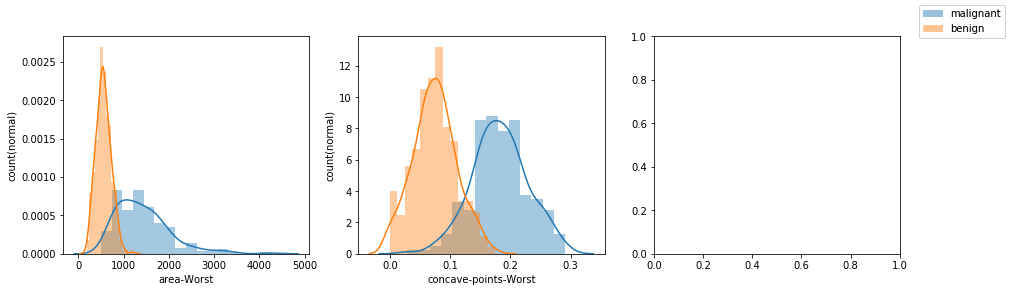

,future,coef
0,radius-Mean,4
1,perimeter-Mean,2
2,area-Mean,1
3,concave-points-Mean,5
4,radius-Worst,3
5,perimeter-Worst,6
6,area-Worst,7
7,concave-points-Worst,8


In [328]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))

draw_plot('radius-Mean' ,0)
draw_plot('perimeter-Mean',1)
draw_plot('area-Mean',2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('concave-points-Mean',0)
draw_plot('radius-Worst',1)
draw_plot('perimeter-Worst',2)

fig, axs = plt.subplots(ncols=3,figsize=(15,4))
draw_plot('area-Worst',0)
draw_plot('concave-points-Worst',1)

plt.show()

df_result_visual = pd.DataFrame(data={
    'future':[
        'radius-Mean',
        'perimeter-Mean',
        'area-Mean',
        'concave-points-Mean',
        'radius-Worst', 
        'perimeter-Worst', 
        'area-Worst', 
        'concave-points-Worst'
    ],
    'coef':[4,2,1,5,3,6,7,8]
})

df_result_visual

## Матрица корреляции

Построим таблицу корреляции признаков для нахождения наиболее свзяанных пар признаков.

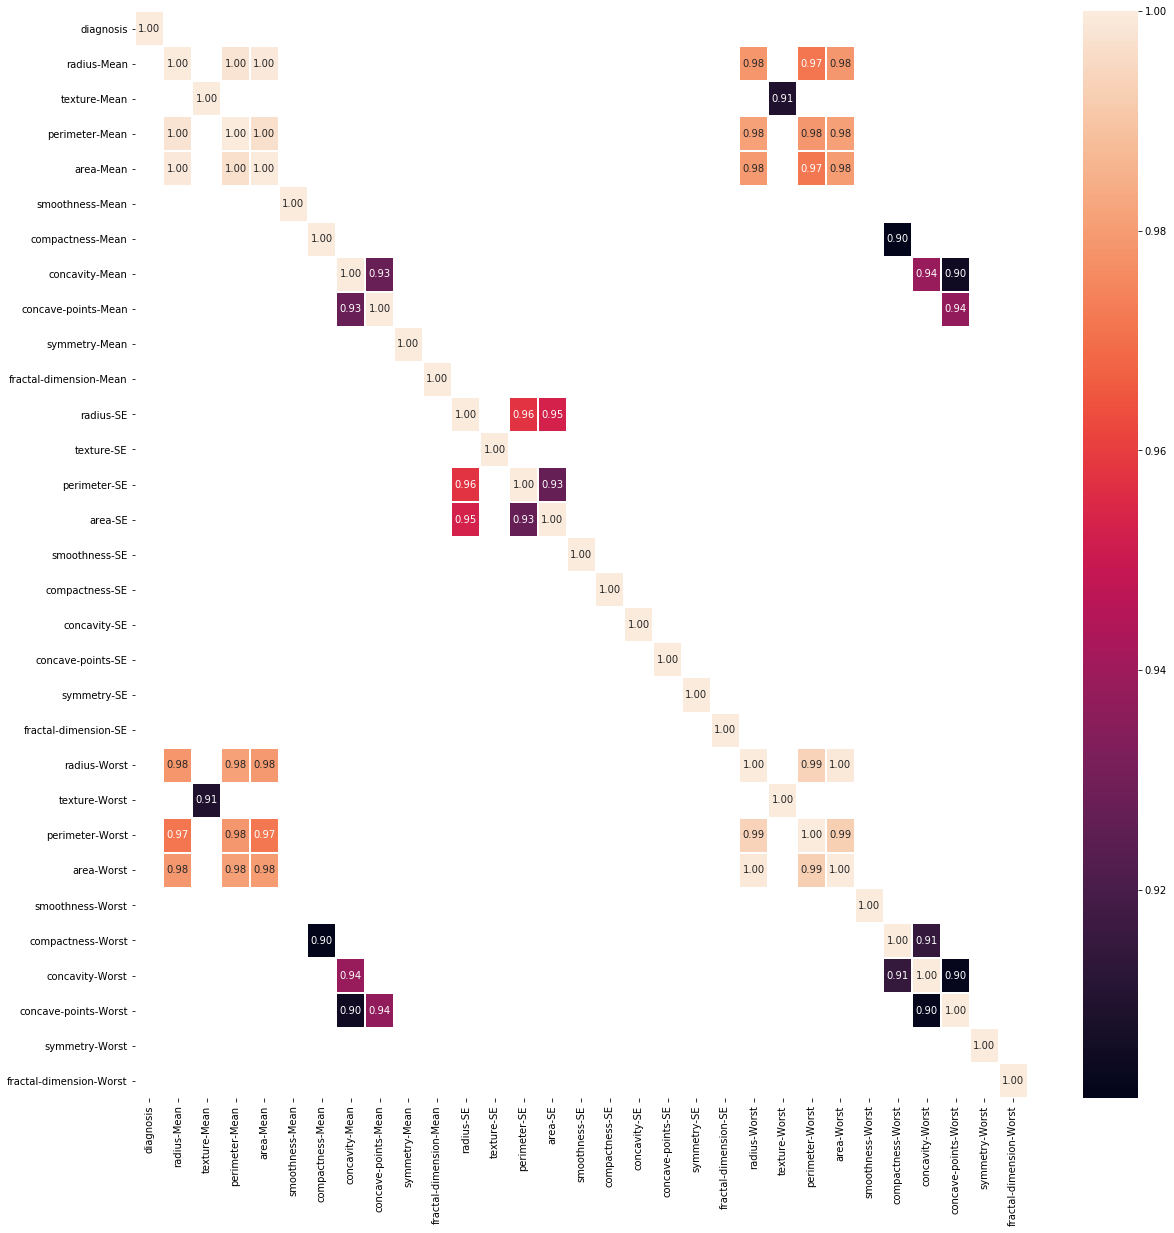

,Corr,future1,future2
6,0.997802,perimeter-Mean,radius-Mean
11,0.999602,area-Mean,radius-Mean
12,0.997068,area-Mean,perimeter-Mean
20,0.927352,concave-points-Mean,concavity-Mean
24,0.957728,perimeter-SE,radius-SE
26,0.952867,area-SE,radius-SE
27,0.926937,area-SE,perimeter-SE
28,0.978604,radius-Worst,radius-Mean
29,0.981244,radius-Worst,perimeter-Mean
30,0.979258,radius-Worst,area-Mean


In [477]:
corr_matrix = df_wdbc.corr(method='spearman')

df_result_corr = corr_matrix[['diagnosis']]
df_result_corr = df_result_corr[(df_result_corr['diagnosis'] > .7) & (df_result_corr['diagnosis'] != 1)]
df_result_corr.reset_index(inplace=True)
df_result_corr.rename(columns={"index": "future", "diagnosis": "coef_corr"}, inplace=True)

corr_matrix = corr_matrix[corr_matrix > .9]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=1, ax=ax)
plt.show()

list_fut = []

for future in res.columns:
    corr_matrix_ = corr_matrix[future].copy()
    corr_matrix_ = corr_matrix_[(~corr_matrix_.isnull()) & (~corr_matrix_.index.isin([future]))]

    for index,_ in enumerate(corr_matrix_):
        list_fut.append({'future1':future,'future2':corr_matrix_.index[index],'Corr':corr_matrix_[index]})
    
df_tmp = pd.DataFrame(list_fut)
df_tmp[df_tmp.duplicated(subset='Corr')]

Таблица выше отражает пары признаков, которые имеют коррелляцию `>0.9`. Данные пары в последующем можно рассмотреть для на предмет исключения признаков из датасета.

Выведем признаки с корреляцией больше 0.7 к целевой переменной

In [478]:
df_result_corr

,future,coef_corr
0,radius-Mean,0.732785
1,perimeter-Mean,0.748496
2,area-Mean,0.734122
3,concavity-Mean,0.733308
4,concave-points-Mean,0.777877
5,area-SE,0.714184
6,radius-Worst,0.787933
7,perimeter-Worst,0.796319
8,area-Worst,0.786902
9,concavity-Worst,0.705734


## Выделение признаков с помощью случайного леса

In [335]:
X = df_wdbc.loc[:, df_wdbc.columns != 'diagnosis']
y = df_wdbc['diagnosis']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


rfr = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=10)
rfr.fit(X_train, y_train)

importances = list(zip(feature_names, rfr.feature_importances_))
importances.sort(reverse=True)

df_result_rndforest = pd.DataFrame(importances,columns=['future','coef'])
df_result_rndforest = df_result_rndforest[df_result_rndforest.coef > .01].sort_values(by='coef', ascending=False)
df_result_rndforest

,future,coef
23,concave-points-Mean,0.427756
21,concave-points-Worst,0.344091
12,perimeter-Worst,0.088237
9,radius-Worst,0.047993
27,area-Worst,0.024047
18,concavity-Worst,0.021720
29,area-Mean,0.012276
2,texture-Mean,0.011909


В таблице выше представлены признаки выделенные с помощью модели случайного леса

Объеденим признаки в одну таблицу

In [483]:
df_result = df_result_visual.merge(df_result_rndforest, left_on='future', right_on='future', how='outer',suffixes=('_visual','_forest'))
df_result = df_result.merge(df_result_corr,left_on='future', right_on='future', how='outer')
df_result.fillna(0,inplace=True)

mmsc = MinMaxScaler()
df_result[['coef_visual', 'coef_forest']] = mmsc.fit_transform(df_result[['coef_visual', 'coef_forest']])

df_result.set_index('future', inplace=True)
df_result = df_result.T
df_result.reset_index(inplace=True)

Построим диграмму по типу радара, чтобы определить наиболее значимые признаки по совкупным методом анализа

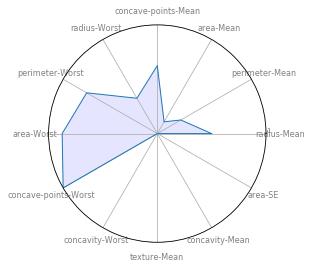

In [481]:
df = df_result
  
categories=list(df)[1:]
N = len(categories)
 
values=df.loc[0].drop('index').values.flatten().tolist()
values += values[:1]
values
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
plt.ylim(0,1)
 
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)


# Вывод

Исходя из диаграммы выше наиболее значимые признаки:

|Значимые признаки|
-
|concave-points-Worst|
|area-Worst|
|perimeter-Worst|
|radius-Worst|
|concave-points-Mean|
|radius-Mean|